https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('/Users/wangluya/PycharmProjects/datasets/digit_recognizer/train.csv',dtype = np.float32)
test= pd.read_csv('/Users/wangluya/PycharmProjects/datasets/digit_recognizer/test.csv',dtype = np.float32)
# print(f'训练数据shape: {train_data.shape}')
# print(f'测试数据shape: {test_data.shape}')

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is  long
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long


In [8]:
featuresTest[0].shape 

torch.Size([784])

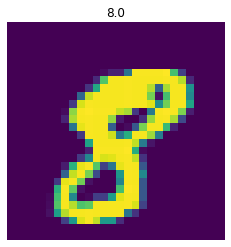

In [23]:
# visualize one of the images in data set
import matplotlib.pyplot as plt

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [19]:
targetsTest[0]

tensor(8)

In [20]:
print(featuresTest.shape ,featuresTrain.shape)

torch.Size([8400, 784]) torch.Size([33600, 784])


In [21]:
print(targetsTest.shape,targetsTrain.shape)

torch.Size([8400]) torch.Size([33600])


举个例子，训练集有1000个样本，batchsize=10，那么：

训练完整个样本集需要：

100次iteration，1次epoch。

In [5]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)



In [6]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# Create Logistic Regression Model

# ANN

# CNN

In [11]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
       
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
cnn_model = CNNModel()

# Cross Entropy Loss 
cnn_error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
cnn_optimizer = torch.optim.SGD(cnn_model.parameters(), lr=learning_rate)

In [12]:
# Traning the Model
count = 0
cnn_loss_list = []
cnn_iteration_list = []
cnn_accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        # train = Variable(images.view(-1, 28*28))
        train = Variable(images.view(100,1,28,28))  #torch.Size([100, 1, 28, 28])
        labels = Variable(labels)
        
        # Clear gradients
        ann_optimizer.zero_grad()
        
        # Forward propagation
        outputs = cnn_model(train)
        
        # Calculate softmax and cross entropy loss
        cnn_loss = cnn_error(outputs, labels)
        
        # Calculate gradients
        cnn_loss.backward()

        # Update parameters
        cnn_optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                # test = Variable(images.view(-1, 28*28))
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = cnn_model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            cnn_loss_list.append(cnn_loss.data)
            cnn_iteration_list.append(count)
            cnn_accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, cnn_loss.data, accuracy))

Iteration: 500  Loss: 2.848034620285034  Accuracy: 11.154762268066406%
Iteration: 1000  Loss: 2.9088146686553955  Accuracy: 9.345237731933594%
Iteration: 1500  Loss: 2.6915762424468994  Accuracy: 8.357142448425293%
Iteration: 2000  Loss: 3.11624813079834  Accuracy: 9.976190567016602%
